In [1]:
import pandas
import pickle
from Swimmer import *
from datetime import datetime
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.cm as cm
import pandas as pd

#apriamo il database
with open("nuotatori_db.pkl","rb") as pkl:
     swimmers = pickle.load( pkl)

In [2]:
#imposto il ratio e facciamo vedere un esempio sul primo nuotatore
RATIO = 0.8
print(swimmers[0].times_date)

[('00:52.08', '27/06/2017'), ('00:52.15', '20/05/2017'), ('00:52.72', '04/11/2017'), ('00:53.00', '07/12/2014'), ('00:53.16', '09/12/2017'), ('00:54.14', '24/05/2014'), ('00:54.21', '06/11/2016'), ('00:54.36', '24/06/2015'), ('00:54.93', '15/12/2013'), ('00:55.28', '01/06/2013'), ('00:55.40', '21/05/2016')]


In [4]:
#filtriamo i nuotatori per il ratio impostato
filtered_swimmers = list(filter(lambda x: x.ratio >= RATIO, swimmers))

In [5]:
#stampiamo tutti i nuotatori che soddisfano la precedente funzione
for i in filtered_swimmers:
    print(str(i))
print (len(filtered_swimmers))

Name: LOCOCCIOLO RAFFAELE Class: 1972 Ratio: 0.8
Name: GIALDI MASSIMILIANO Class: 1968 Ratio: 0.8
Name: BALDINI CRISTIANO Class: 1968 Ratio: 0.8666666666666667
Name: BORSARI ANDREA Class: 1970 Ratio: 1.0
Name: CAPITANI ENRICO Class: 1969 Ratio: 0.8
Name: ANSALONI ETTORE Class: 1973 Ratio: 0.8
Name: GIGLIETTI GIANLUCA Class: 1961 Ratio: 0.8
Name: DI MARTINO MARCO Class: 1971 Ratio: 0.9333333333333333
Name: MARIANI RICCARDO Class: 1970 Ratio: 0.8
Name: BATTISTINI MARCO Class: 1972 Ratio: 0.8666666666666667
Name: BRUNI PIERFRANCESCO Class: 1972 Ratio: 1.0
Name: MARINO SALERNO MAURO Class: 1971 Ratio: 1.0
Name: LIBERATI ANDREA Class: 1971 Ratio: 0.8666666666666667
Name: BADALONI LUIGI Class: 1965 Ratio: 0.8666666666666667
Name: GIORGIO MASSIMO Class: 1964 Ratio: 0.8666666666666667
Name: BERRINI CLAUDIO Class: 1954 Ratio: 0.9333333333333333
Name: LORETI STEFANO Class: 1966 Ratio: 1.0
Name: MAZZOLA DAVIDE GIULIO Class: 1973 Ratio: 0.8
18


In [6]:
#lista dei nuotatori con i dati filtrati
for i in filtered_swimmers:
    print(str(i), i.times_date, i.locality)

Name: LOCOCCIOLO RAFFAELE Class: 1972 Ratio: 0.8 [('00:52.68', '23/06/2009'), ('00:52.74', '17/05/2009'), ('00:53.15', '05/12/2009'), ('00:53.15', '09/05/2009'), ('00:53.25', '30/11/2008'), ('00:53.39', '08/03/2009'), ('00:54.30', '28/06/2006'), ('00:54.81', '11/01/2009'), ('00:55.05', '29/05/2010'), ('00:55.07', '14/05/2005'), ('00:55.11', '27/06/2004'), ('00:55.17', '24/06/2003'), ('00:55.24', '25/05/2003'), ('00:55.26', '21/06/2010'), ('00:55.31', '06/07/2005'), ('00:55.32', '25/05/2003'), ('00:55.56', '20/03/2010'), ('00:55.86', '30/10/2002'), ('00:55.88', '01/06/2011'), ('00:55.92', '20/06/2011'), ('00:55.97', '08/12/2012'), ('00:56.37', '02/07/2013'), ('00:56.69', '01/06/2013'), ('00:56.72', '11/05/2013'), ('00:56.88', '10/05/2014'), ('00:57.09', '01/05/2012'), ('00:57.28', '23/05/2015'), ('00:57.29', '04/06/2006'), ('00:57.50', '01/11/2015')] ['RICCIONE', 'Prato', 'Riccione', 'San Marino', 'Riccione', 'San Marino', 'RICCIONE', 'Ravenna', 'Prato', 'Roma Flaminio', 'ROSSANO CALABR

In [7]:
 def str_to_date(d):
        """prende in input una data formattata "%d/%m/%Y"""
        return datetime.strptime(d[1], "%d/%m/%Y")

In [8]:
 def str_to_time(s):
        """prende in input un tempo formattato "%s.%us"""
        a=datetime.strptime(s[0], "%M:%S.%f")
        return a.minute*60 + a.second + (a.microsecond/ (10**6))
        

In [9]:
 def str_to_time2(s):
        """prende in input un tempo formattato "%s.%us"""
        return datetime.strptime(s[0], "%M:%S.%f")

In [10]:
for i in filtered_swimmers:
    i.converted_date_time=[]
    for j in i.times_date:
        i.converted_date_time.append(
        (str_to_date(j),
        str_to_time(j)))

In [11]:
for i in filtered_swimmers:
    print(str(i),
        #tuple((x.year,x.month,x.day,y)for x,y in i.converted_date_time)
        list(((j.date(),k) for j,k in i.converted_date_time)))

Name: LOCOCCIOLO RAFFAELE Class: 1972 Ratio: 0.8 [(datetime.date(2009, 6, 23), 52.68), (datetime.date(2009, 5, 17), 52.74), (datetime.date(2009, 12, 5), 53.15), (datetime.date(2009, 5, 9), 53.15), (datetime.date(2008, 11, 30), 53.25), (datetime.date(2009, 3, 8), 53.39), (datetime.date(2006, 6, 28), 54.3), (datetime.date(2009, 1, 11), 54.81), (datetime.date(2010, 5, 29), 55.05), (datetime.date(2005, 5, 14), 55.07), (datetime.date(2004, 6, 27), 55.11), (datetime.date(2003, 6, 24), 55.17), (datetime.date(2003, 5, 25), 55.24), (datetime.date(2010, 6, 21), 55.26), (datetime.date(2005, 7, 6), 55.31), (datetime.date(2003, 5, 25), 55.32), (datetime.date(2010, 3, 20), 55.56), (datetime.date(2002, 10, 30), 55.86), (datetime.date(2011, 6, 1), 55.88), (datetime.date(2011, 6, 20), 55.92), (datetime.date(2012, 12, 8), 55.97), (datetime.date(2013, 7, 2), 56.37), (datetime.date(2013, 6, 1), 56.69), (datetime.date(2013, 5, 11), 56.72), (datetime.date(2014, 5, 10), 56.88), (datetime.date(2012, 5, 1), 57

Altrimenti cominciate a fare un po’ di statistica descrittiva.
In particolare:

1. Cosa succede se scelgo il 70% invece dell’80% ? Come cambia il dataset?
2. Per ogni gara, rappresentate (visualizzate) le prestazioni su un grafico con sulle ascisse la data e sulle ordinate il tempo di gara.
3. Calcolate medie, mediana, percentile, ecc.

In generale, quello che vogliamo fare è prevedere la performance di un atleta in funzione dell’età utilizzando questo dataset come training set.
Quindi iniziate a pensare quali variabili e quale modello utilizzare per fare questa previsione. Per esempio: le stagioni impattano sulla performance?

A presto,

FR

In [12]:
#ora facciamo vedere cosa succede al dataset se prendiamo i nuotatori che hanno partecipato al 70% di gare
RATIO = 0.7

In [13]:
#filtriamo i nuotatori per il ratio impostato
filtered_swimmers2 = list(filter(lambda x: x.ratio >= RATIO, swimmers))

In [14]:
#stampiamo tutti i nuotatori che soddisfano la precedente funzione
for i in filtered_swimmers2:
    print(str(i))
print (len(filtered_swimmers2))

Name: LOCOCCIOLO RAFFAELE Class: 1972 Ratio: 0.8
Name: GIALDI MASSIMILIANO Class: 1968 Ratio: 0.8
Name: STELL DAVIDE Class: 1973 Ratio: 0.7333333333333333
Name: BALDINI CRISTIANO Class: 1968 Ratio: 0.8666666666666667
Name: BORSARI ANDREA Class: 1970 Ratio: 1.0
Name: CAPITANI ENRICO Class: 1969 Ratio: 0.8
Name: ANSALONI ETTORE Class: 1973 Ratio: 0.8
Name: GIGLIETTI GIANLUCA Class: 1961 Ratio: 0.8
Name: DI MARTINO MARCO Class: 1971 Ratio: 0.9333333333333333
Name: MARIANI RICCARDO Class: 1970 Ratio: 0.8
Name: PICCARI MIRCO Class: 1978 Ratio: 0.7333333333333333
Name: GRIFFO FABRIZIO Class: 1957 Ratio: 0.7333333333333333
Name: PIOLA PAOLO Class: 1966 Ratio: 0.7333333333333333
Name: BATTISTINI MARCO Class: 1972 Ratio: 0.8666666666666667
Name: BRUNI PIERFRANCESCO Class: 1972 Ratio: 1.0
Name: MARINO SALERNO MAURO Class: 1971 Ratio: 1.0
Name: LIBERATI ANDREA Class: 1971 Ratio: 0.8666666666666667
Name: BADALONI LUIGI Class: 1965 Ratio: 0.8666666666666667
Name: GIORGIO MASSIMO Class: 1964 Ratio: 

In [15]:
#Listiamo i tempi di ogni nuotatore
def tempitotali(x):
    i.listtime=[]
    for j in i.times_date:
        i.listtime.append(
        str_to_time(j))
    return i.listtime

In [16]:
#Listiamo le date di ogni nuotatore
def datetotali(x):
    i.listdate=[]
    for j in i.times_date:
        i.listdate.append((str_to_date(j).date()))
    return i.listdate

In [17]:
#
# Forniamo la descrizione di ogni nuotatore
#

def descriptiveStat (x):
    print (str(x))
    print ('Dataset lenght:', len(tempitotali(x)))
    print ('Minimum value:', np.min(tempitotali(x)))
    print ('Maximum value:', np.max(tempitotali(x)))
    print ('Mean value:', np.mean(tempitotali(x)))
    print ('Median value:', np.median(tempitotali(x)))
    print ('First quartile', np.percentile((tempitotali(x)), 25))
    print ('Third quartile', np.percentile((tempitotali(x)), 75))

In [18]:
for i in filtered_swimmers:
    descriptiveStat(i)

Name: LOCOCCIOLO RAFFAELE Class: 1972 Ratio: 0.8
Dataset lenght: 29
Minimum value: 52.68
Maximum value: 57.5
Mean value: 55.3106896552
Median value: 55.31
First quartile 54.81
Third quartile 56.37
Name: GIALDI MASSIMILIANO Class: 1968 Ratio: 0.8
Dataset lenght: 24
Minimum value: 53.07
Maximum value: 56.66
Mean value: 55.0958333333
Median value: 55.185
First quartile 54.5125
Third quartile 55.865
Name: BALDINI CRISTIANO Class: 1968 Ratio: 0.8666666666666667
Dataset lenght: 42
Minimum value: 54.25
Maximum value: 60.1
Mean value: 55.6776190476
Median value: 55.51
First quartile 54.8025
Third quartile 56.315
Name: BORSARI ANDREA Class: 1970 Ratio: 1.0
Dataset lenght: 40
Minimum value: 54.55
Maximum value: 59.91
Mean value: 57.4195
Median value: 57.63
First quartile 55.9825
Third quartile 58.72
Name: CAPITANI ENRICO Class: 1969 Ratio: 0.8
Dataset lenght: 27
Minimum value: 55.15
Maximum value: 58.52
Mean value: 57.1340740741
Median value: 57.21
First quartile 56.61
Third quartile 57.84
Name:

In [19]:
nome=[]
tempi=[]
date=[]
for i in filtered_swimmers:
    for j in i.times_date:
        nome.append(i.name)
        tempi.append((str_to_time(j)))
        date.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
        
Nuotatori = pd.DataFrame({'Nuotatore': nome,'Time': tempi, 'Date': date})
Nuotatori

,Date,Nuotatore,Time
0,2008-2009,LOCOCCIOLO RAFFAELE,52.68
1,2008-2009,LOCOCCIOLO RAFFAELE,52.74
2,2009-2010,LOCOCCIOLO RAFFAELE,53.15
3,2008-2009,LOCOCCIOLO RAFFAELE,53.15
4,2008-2009,LOCOCCIOLO RAFFAELE,53.25
5,2008-2009,LOCOCCIOLO RAFFAELE,53.39
6,2005-2006,LOCOCCIOLO RAFFAELE,54.30
7,2008-2009,LOCOCCIOLO RAFFAELE,54.81
8,2009-2010,LOCOCCIOLO RAFFAELE,55.05
9,2004-2005,LOCOCCIOLO RAFFAELE,55.07


In [20]:
Nuotatori_plot = pd.DataFrame(Nuotatori.groupby([Nuotatori['Date'], Nuotatori['Nuotatore']]).Time.agg('mean'))

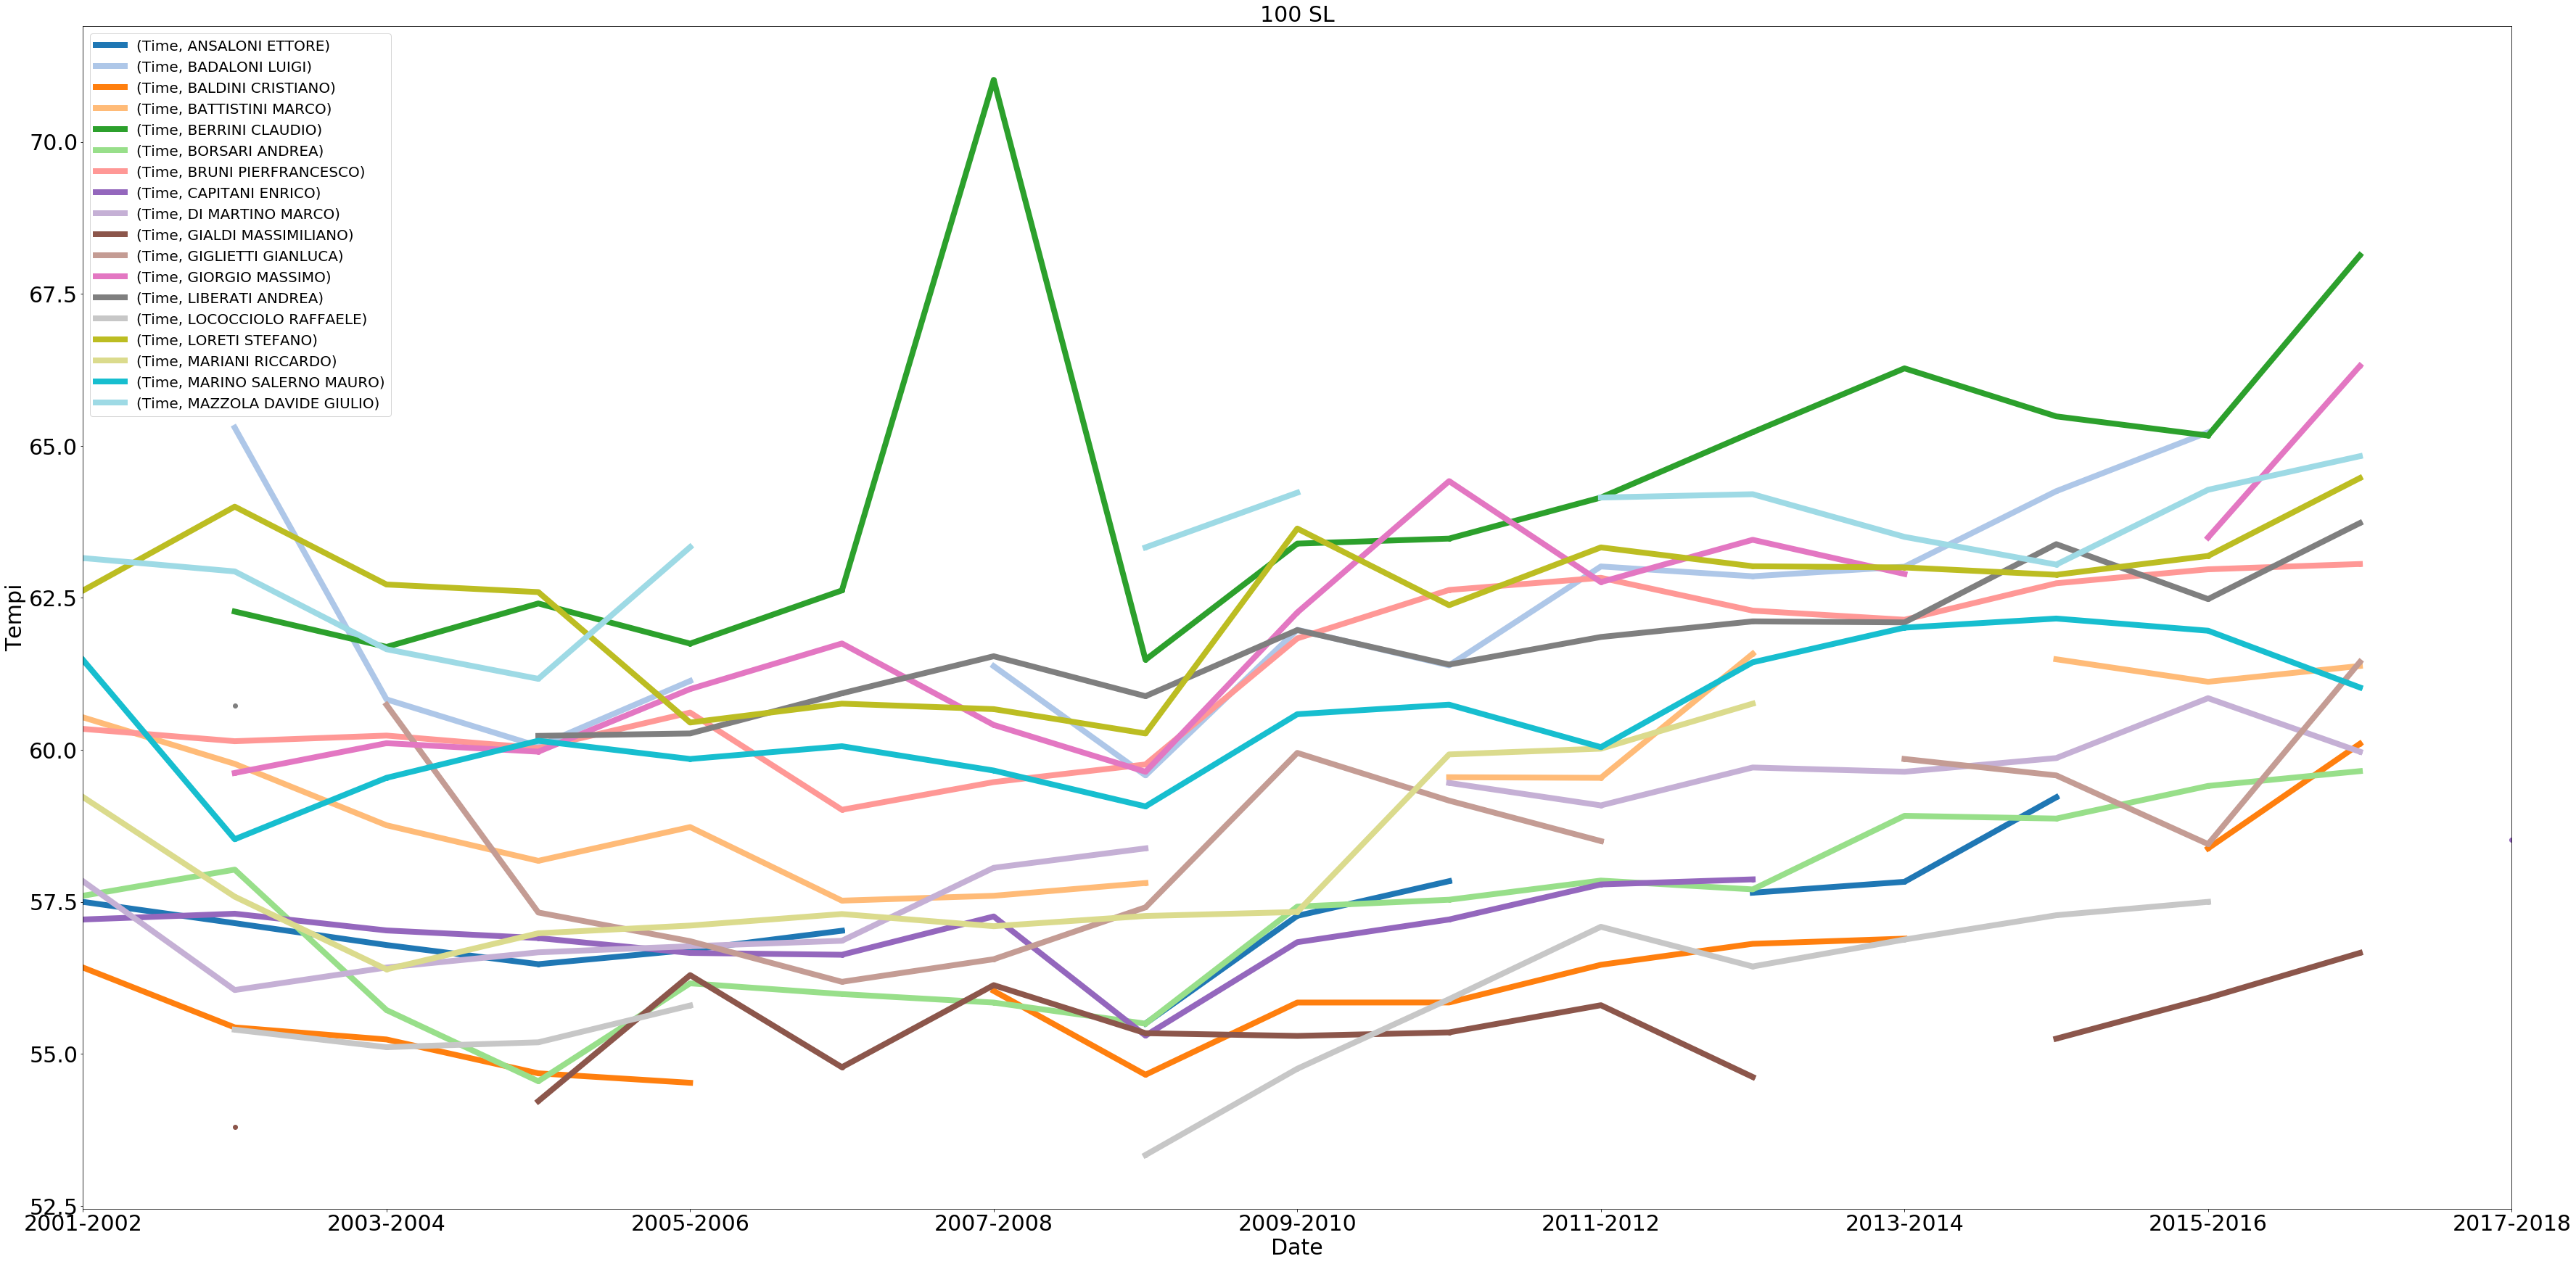

In [21]:
colors=cm.tab20(np.linspace(0,1,len(filtered_swimmers)))
Nuotatori_plot.pivot_table(index='Date', columns='Nuotatore').plot(marker= 'o',linestyle='-',linewidth=8,figsize=(60, 30), fontsize=30, color=colors)
plt.xlabel('Date',fontsize=30)
plt.ylabel('Tempi',fontsize=30)
plt.title('100 SL',fontsize=30)
plt.legend(fontsize=20)

In [22]:
def select_season_of_year(d,s):
        """prende in input una data formattata in datetime e decide la stagionalita` dell'anno di partecipazione"""
        date = datetime.strptime(d[1], "%d/%m/%Y")
        if s=='inverno':
            if date.month >= 12 or date.month <= 2:
                return True
        if s=='primavera':
            if date.month >= 3 and date.month <= 5:
                return True
        if s=='estate':
            if date.month >= 6 and date.month <= 8:
                return True
        if s=='autunno':
            if date.month >= 9 and date.month <= 11:
                return True
        return False

In [23]:
nomep=[]
tempip=[]
datep=[]
nomee=[]
tempie=[]
datee=[]
nomea=[]
tempia=[]
datea=[]
nomei=[]
tempii=[]
datei=[]
for i in filtered_swimmers:
    for j in i.times_date:
        if select_season_of_year(j,'inverno'):
            nomei.append(i.name)
            datei.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempii.append((str_to_time(j)))
        if select_season_of_year(j,'primavera'):
            nomep.append(i.name)
            datep.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempip.append((str_to_time(j)))
        if select_season_of_year(j,'estate'):
            nomee.append(i.name)
            datee.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempie.append((str_to_time(j)))
        if select_season_of_year(j,'autunno'):
            nomea.append(i.name)
            datea.append(str(Swimmer.get_partecipation_year(str_to_date(j))))
            tempia.append((str_to_time(j)))
            
Nuotatori_primavera = pd.DataFrame({'Nuotatore': nomep,'Time': tempip, 'Date': datep})
Nuotatori_estate = pd.DataFrame({'Nuotatore': nomee,'Time': tempie, 'Date': datee})
Nuotatori_autunno = pd.DataFrame({'Nuotatore': nomea,'Time': tempia, 'Date': datea})
Nuotatori_inverno = pd.DataFrame({'Nuotatore': nomei,'Time': tempii, 'Date': datei})

In [24]:
Nuotatori_primavera_plot = pd.DataFrame(Nuotatori_primavera.groupby([Nuotatori_primavera['Date'], Nuotatori_primavera['Nuotatore']]).Time.agg('mean'))
Nuotatori_estate_plot = pd.DataFrame(Nuotatori_estate.groupby([Nuotatori_estate['Date'], Nuotatori_estate['Nuotatore']]).Time.agg('mean'))
Nuotatori_autunno_plot = pd.DataFrame(Nuotatori_autunno.groupby([Nuotatori_autunno['Date'], Nuotatori_autunno['Nuotatore']]).Time.agg('mean'))
Nuotatori_inverno_plot = pd.DataFrame(Nuotatori_inverno.groupby([Nuotatori_inverno['Date'], Nuotatori_inverno['Nuotatore']]).Time.agg('mean'))                  

In [25]:
Nuotatori_primavera_pivot = Nuotatori_primavera_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_inverno_pivot = Nuotatori_inverno_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_autunno_pivot = Nuotatori_autunno_plot.pivot_table(index='Date', columns='Nuotatore')
Nuotatori_estate_pivot = Nuotatori_estate_plot.pivot_table(index='Date', columns='Nuotatore')

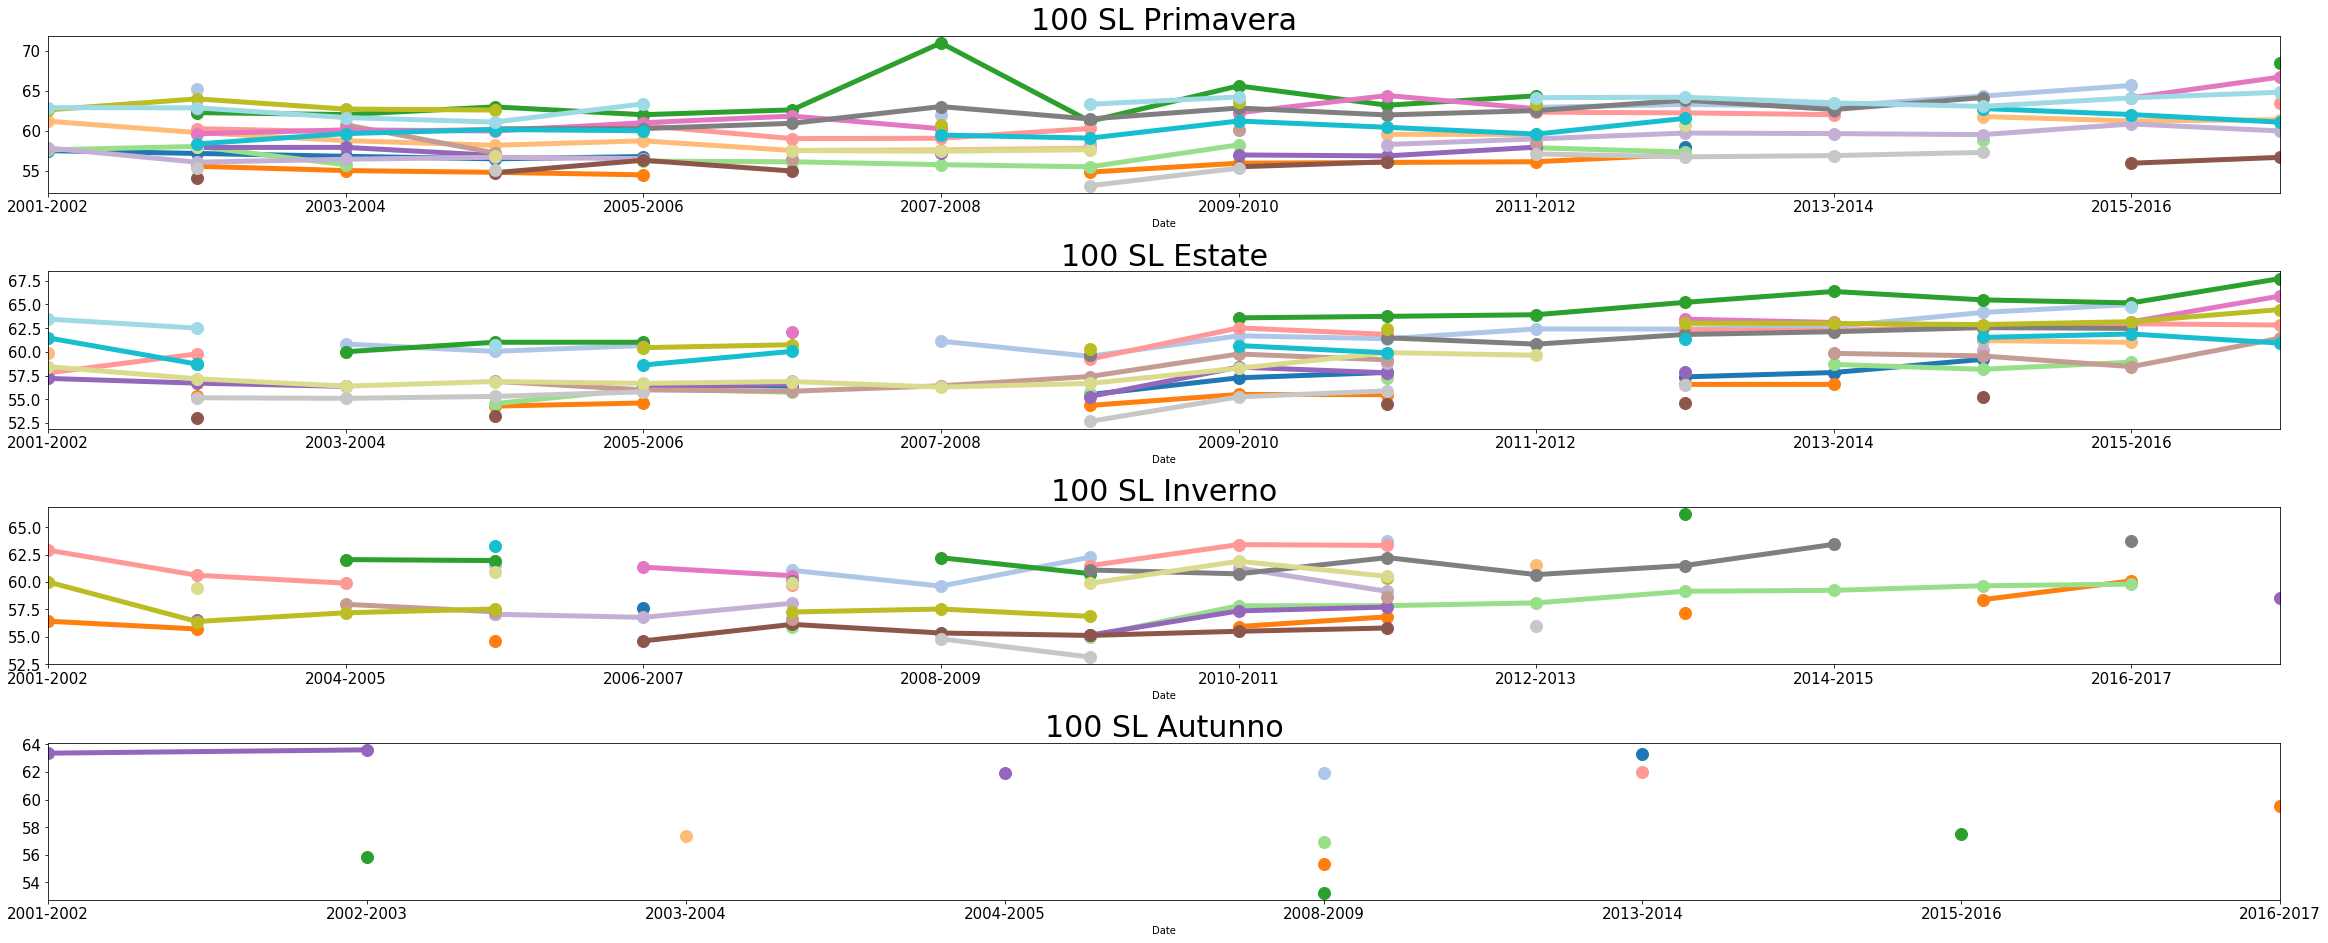

In [36]:
plt.subplot(4, 1, 1)
Nuotatori_primavera_pivot.plot(ax=plt.gca(),title='100 SL Primavera',marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title('100 SL Primavera',fontsize=30)

plt.subplot(4, 1, 2)
Nuotatori_estate_pivot.plot(ax=plt.gca(),title='100 SL Estate',marker= 'o', markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title('100 SL Estate',fontsize=30)

plt.subplot(4, 1, 3)
Nuotatori_inverno_pivot.plot(ax=plt.gca(),title='100 SL Inverno',marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title('100 SL Inverno',fontsize=30)

plt.subplot(4, 1, 4)
Nuotatori_autunno_pivot.plot(ax=plt.gca(),title='100 SL Autunno',marker= 'o',markersize=12,linestyle='-',linewidth=5,figsize = (40,20), fontsize=15, color=colors, legend=False)
plt.title('100 SL Autunno',fontsize=30)

plt.subplots_adjust(top=0.62, bottom=0.02, hspace=0.5)

Text(0.5,1,'100 SL Autunno')

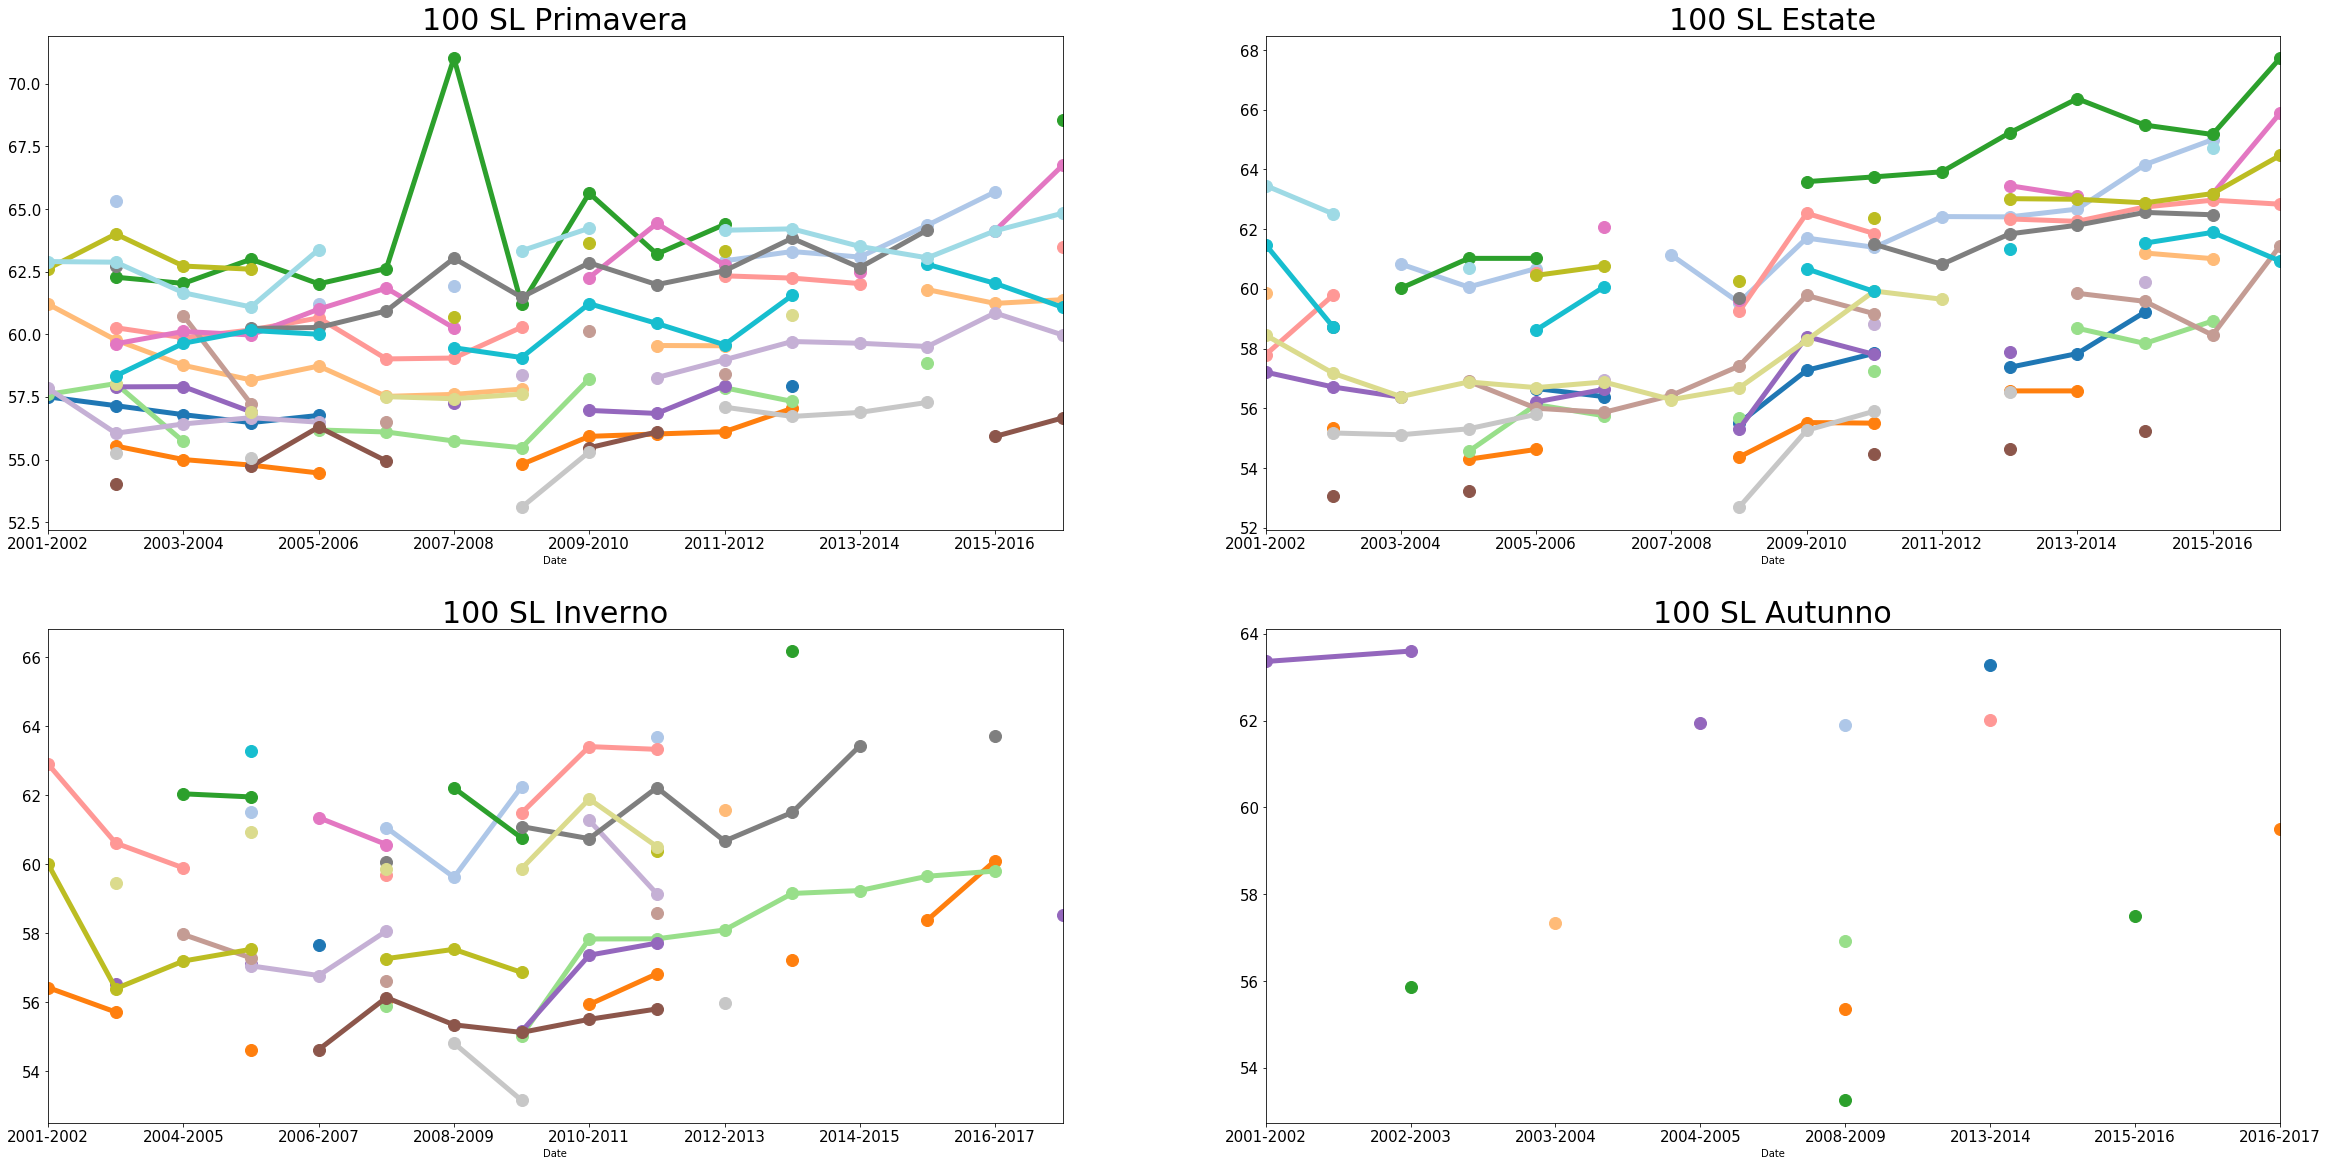

In [190]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (40,20))

Nuotatori_primavera_pivot.plot(ax=axes[0,0],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[0,0].set_title('100 SL Primavera',fontsize=30)

Nuotatori_estate_pivot.plot(ax=axes[0,1],marker= 'o', markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[0,1].set_title('100 SL Estate',fontsize=30)

Nuotatori_inverno_pivot.plot(ax=axes[1,0],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[1,0].set_title('100 SL Inverno',fontsize=30)

Nuotatori_autunno_pivot.plot(ax=axes[1,1],marker= 'o',markersize=12,linestyle='-',linewidth=5, fontsize=15, color=colors, legend=False)
axes[1,1].set_title('100 SL Autunno',fontsize=30)